In [1]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-16 06:21:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-16 06:21:16 (60.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2022-10-16 06:22:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   110MB/s    in 14s     

2022-10-16 06:22:19 (110 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [6]:
from helper_functions import unzip_data , walk_through_dir

In [8]:
unzip_data("101_food_classes_10_percent.zip")

In [9]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pork_chop'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/caesar_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/churros'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/beef_carpaccio'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/tiramisu'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/peking_duck'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/omelette'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cup_cakes'.
There are 0 directories and 75 images in '101_foo

In [11]:
# preprocessing
import tensorflow as tf

In [12]:
train = "101_food_classes_10_percent/train/"
test =" 101_food_classes_10_percent/test/"

In [14]:
IMG_SIZE = (224,224)
train_data_all= tf.keras.preprocessing.image_dataset_from_directory(train, 
                                                                    label_mode = "categorical",
                                                                    image_size = IMG_SIZE)
test_data_all= tf.keras.preprocessing.image_dataset_from_directory(train, 
                                                                    label_mode = "categorical",
                                                                    image_size = IMG_SIZE,
                                                                   shuffle = False)

Found 7575 files belonging to 101 classes.
Found 7575 files belonging to 101 classes.


# Training our big model
1- create a checkpoint callback
2- create a data augmantion layer
3- create feature extractor layer

In [21]:
# check_point
check_point = tf.keras.callbacks.ModelCheckpoint("foodvision/checkpoint.ckpt", 
                                               save_best_only= True ,
                                               save_weights_only = True,
                                                monitor = "val_accuracy" )

In [17]:
# create a data augmantation layer
from tensorflow.keras import layers


In [20]:
data_augmantation = tf.keras.Sequential([
    layers.RandomContrast(0.2),
    layers.RandomFlip(),
    layers.RandomHeight(0.2),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2), 
   # layers.Rescaling(1./255)
    
] , name= "data_augmantation_layer")

In [ ]:
# Visualise 


In [27]:
# Building a functional model
base_line = tf.keras.applications.EfficientNetB0(include_top=False, # we are using foodvision not imgnet 
                            )
base_line.trainable = False # freeze the model
# input layer
inputs = layers.Input(shape = (224,224,3))

x = data_augmantation(inputs)
x = base_line(x, training = False)
# feature vector
x = layers.GlobalAveragePooling2D() (x)
#output

output = layers.Dense(len(train_data_all.class_names), activation = "softmax") (x)
# the model

model_0 = tf.keras.Model(inputs , output)

In [28]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmantation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

In [29]:
# compile model
model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "accuracy"
)

In [31]:
#fitting the model
history_0 = model_0.fit(train_data_all, epochs = 5, 
                        steps_per_epoch = len(train_data_all), 
                        validation_data = test_data_all,
                        validation_steps = 0.25 * len(test_data_all),
                        callbacks = [check_point])

Epoch 1/5


237/237 [==============================] - 98s 344ms/step - loss: 3.5262 - accuracy: 0.2375 - val_loss: 2.4698 - val_accuracy: 0.4734
Epoch 2/5
237/237 [==============================] - 74s 311ms/step - loss: 2.4155 - accuracy: 0.4437 - val_loss: 1.9336 - val_accuracy: 0.5578
Epoch 3/5
237/237 [==============================] - 74s 309ms/step - loss: 2.0441 - accuracy: 0.5133 - val_loss: 1.6728 - val_accuracy: 0.6047
Epoch 4/5
237/237 [==============================] - 74s 312ms/step - loss: 1.8377 - accuracy: 0.5486 - val_loss: 1.5015 - val_accuracy: 0.6469
Epoch 5/5
237/237 [==============================] - 75s 313ms/step - loss: 1.6909 - accuracy: 0.5823 - val_loss: 1.4077 - val_accuracy: 0.6672


In [32]:
model_0.evaluate(test_data_all)

237/237 [==============================] - 18s 77ms/step - loss: 1.3462 - accuracy: 0.6639


[1.3462364673614502, 0.6638944149017334]

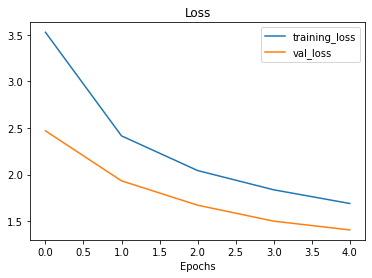

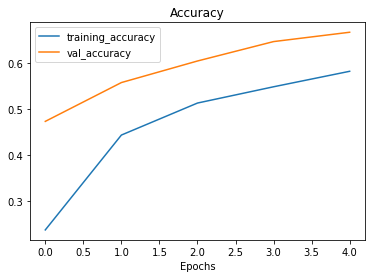

In [34]:
from helper_functions import plot_loss_curves
plot_loss_curves(history_0)

# Fine Tuning 
unfreeze some of modeles

In [53]:
base_line.trainable = True
for layer in base_line.layers[:-5]:
  layer.trainable = False


In [58]:
# compile model
model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.0001),
    metrics = "accuracy"
)

In [59]:
#fitting the model
history_0 = model_0.fit(train_data_all, epochs = 10, 
                        steps_per_epoch = len(train_data_all), 
                        validation_data = test_data_all,
                        validation_steps = 0.25 * len(test_data_all),
                        callbacks = [check_point])

Epoch 1/10


237/237 [==============================] - 80s 305ms/step - loss: 1.3421 - accuracy: 0.6496 - val_loss: 1.1024 - val_accuracy: 0.7021
Epoch 2/10
237/237 [==============================] - 73s 303ms/step - loss: 1.1994 - accuracy: 0.6875 - val_loss: 1.0300 - val_accuracy: 0.7203
Epoch 3/10
237/237 [==============================] - 72s 303ms/step - loss: 1.1267 - accuracy: 0.7020 - val_loss: 0.9620 - val_accuracy: 0.7323
Epoch 4/10
237/237 [==============================] - 71s 298ms/step - loss: 1.0707 - accuracy: 0.7154 - val_loss: 0.9216 - val_accuracy: 0.7406
Epoch 5/10
237/237 [==============================] - 72s 302ms/step - loss: 1.0171 - accuracy: 0.7282 - val_loss: 0.8727 - val_accuracy: 0.7437
Epoch 6/10
237/237 [==============================] - 71s 297ms/step - loss: 0.9753 - accuracy: 0.7370 - val_loss: 0.8392 - val_accuracy: 0.7583
Epoch 7/10
237/237 [==============================] - 72s 303ms/step - loss: 0.9265 - accuracy: 0.7513 - val_loss: 0.8193 - val_accuracy: 0.7

In [60]:
model_0.evaluate(test_data_all)

237/237 [==============================] - 20s 84ms/step - loss: 0.7114 - accuracy: 0.7993


[0.7113586664199829, 0.7993399500846863]

# Downloading a pretrained model

In [61]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2022-10-16 07:58:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.251.18.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M   215MB/s    in 0.2s    

2022-10-16 07:58:03 (215 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [62]:
unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

In [64]:
import tensorflow as tf 
loaded_model = tf.keras.models.load_model("06_101_food_class_10_percent_saved_big_dog_model")

In [65]:
result_loaded = loaded_model.evaluate(test_data_all)

237/237 [==============================] - 20s 78ms/step - loss: 0.3607 - accuracy: 0.8892


In [66]:
preds_prob = loaded_model.predict(test_data_all)

237/237 [==============================] - 20s 80ms/step


In [72]:
len()

1

In [78]:
elemants = []
for elemant in test_data_all.take(1):
  elemants.append(elemant)

In [86]:
my_preds = loaded_model.predict(elemants[0][0])

1/1 [==============================] - 1s 1s/step


In [93]:
my_preds.shape

(32, 101)

In [95]:
tf.argmax(my_preds, axis=1)

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([ 0, 22,  0,  0, 39,  8,  0,  0, 98,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 42,  0, 52,  0,  0,  0,  0,  2,  0, 39, 98,  0,  0])>

In [101]:
tf.argmax(elemants[0][1], axis=1)

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [105]:
len(elemants[0][0])

32

In [106]:
len(preds_prob)

7575

In [109]:
preds = preds_prob.argmax(axis= 1)

In [111]:
len(preds)

7575

In [119]:
# extract the true labels
y_labels = []
for image , label in test_data_all.unbatch():
  y_labels.append(label.numpy().argmax())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [122]:
import pandas as pd
df = pd.DataFrame(y_labels)

In [128]:
pd.unique(df[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [141]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [130]:
accuracy_score(y_labels,preds)

0.8892409240924093

In [134]:
cm = confusion_matrix(y_labels, preds)

In [136]:
from helper_functions import make_confusion_matrix


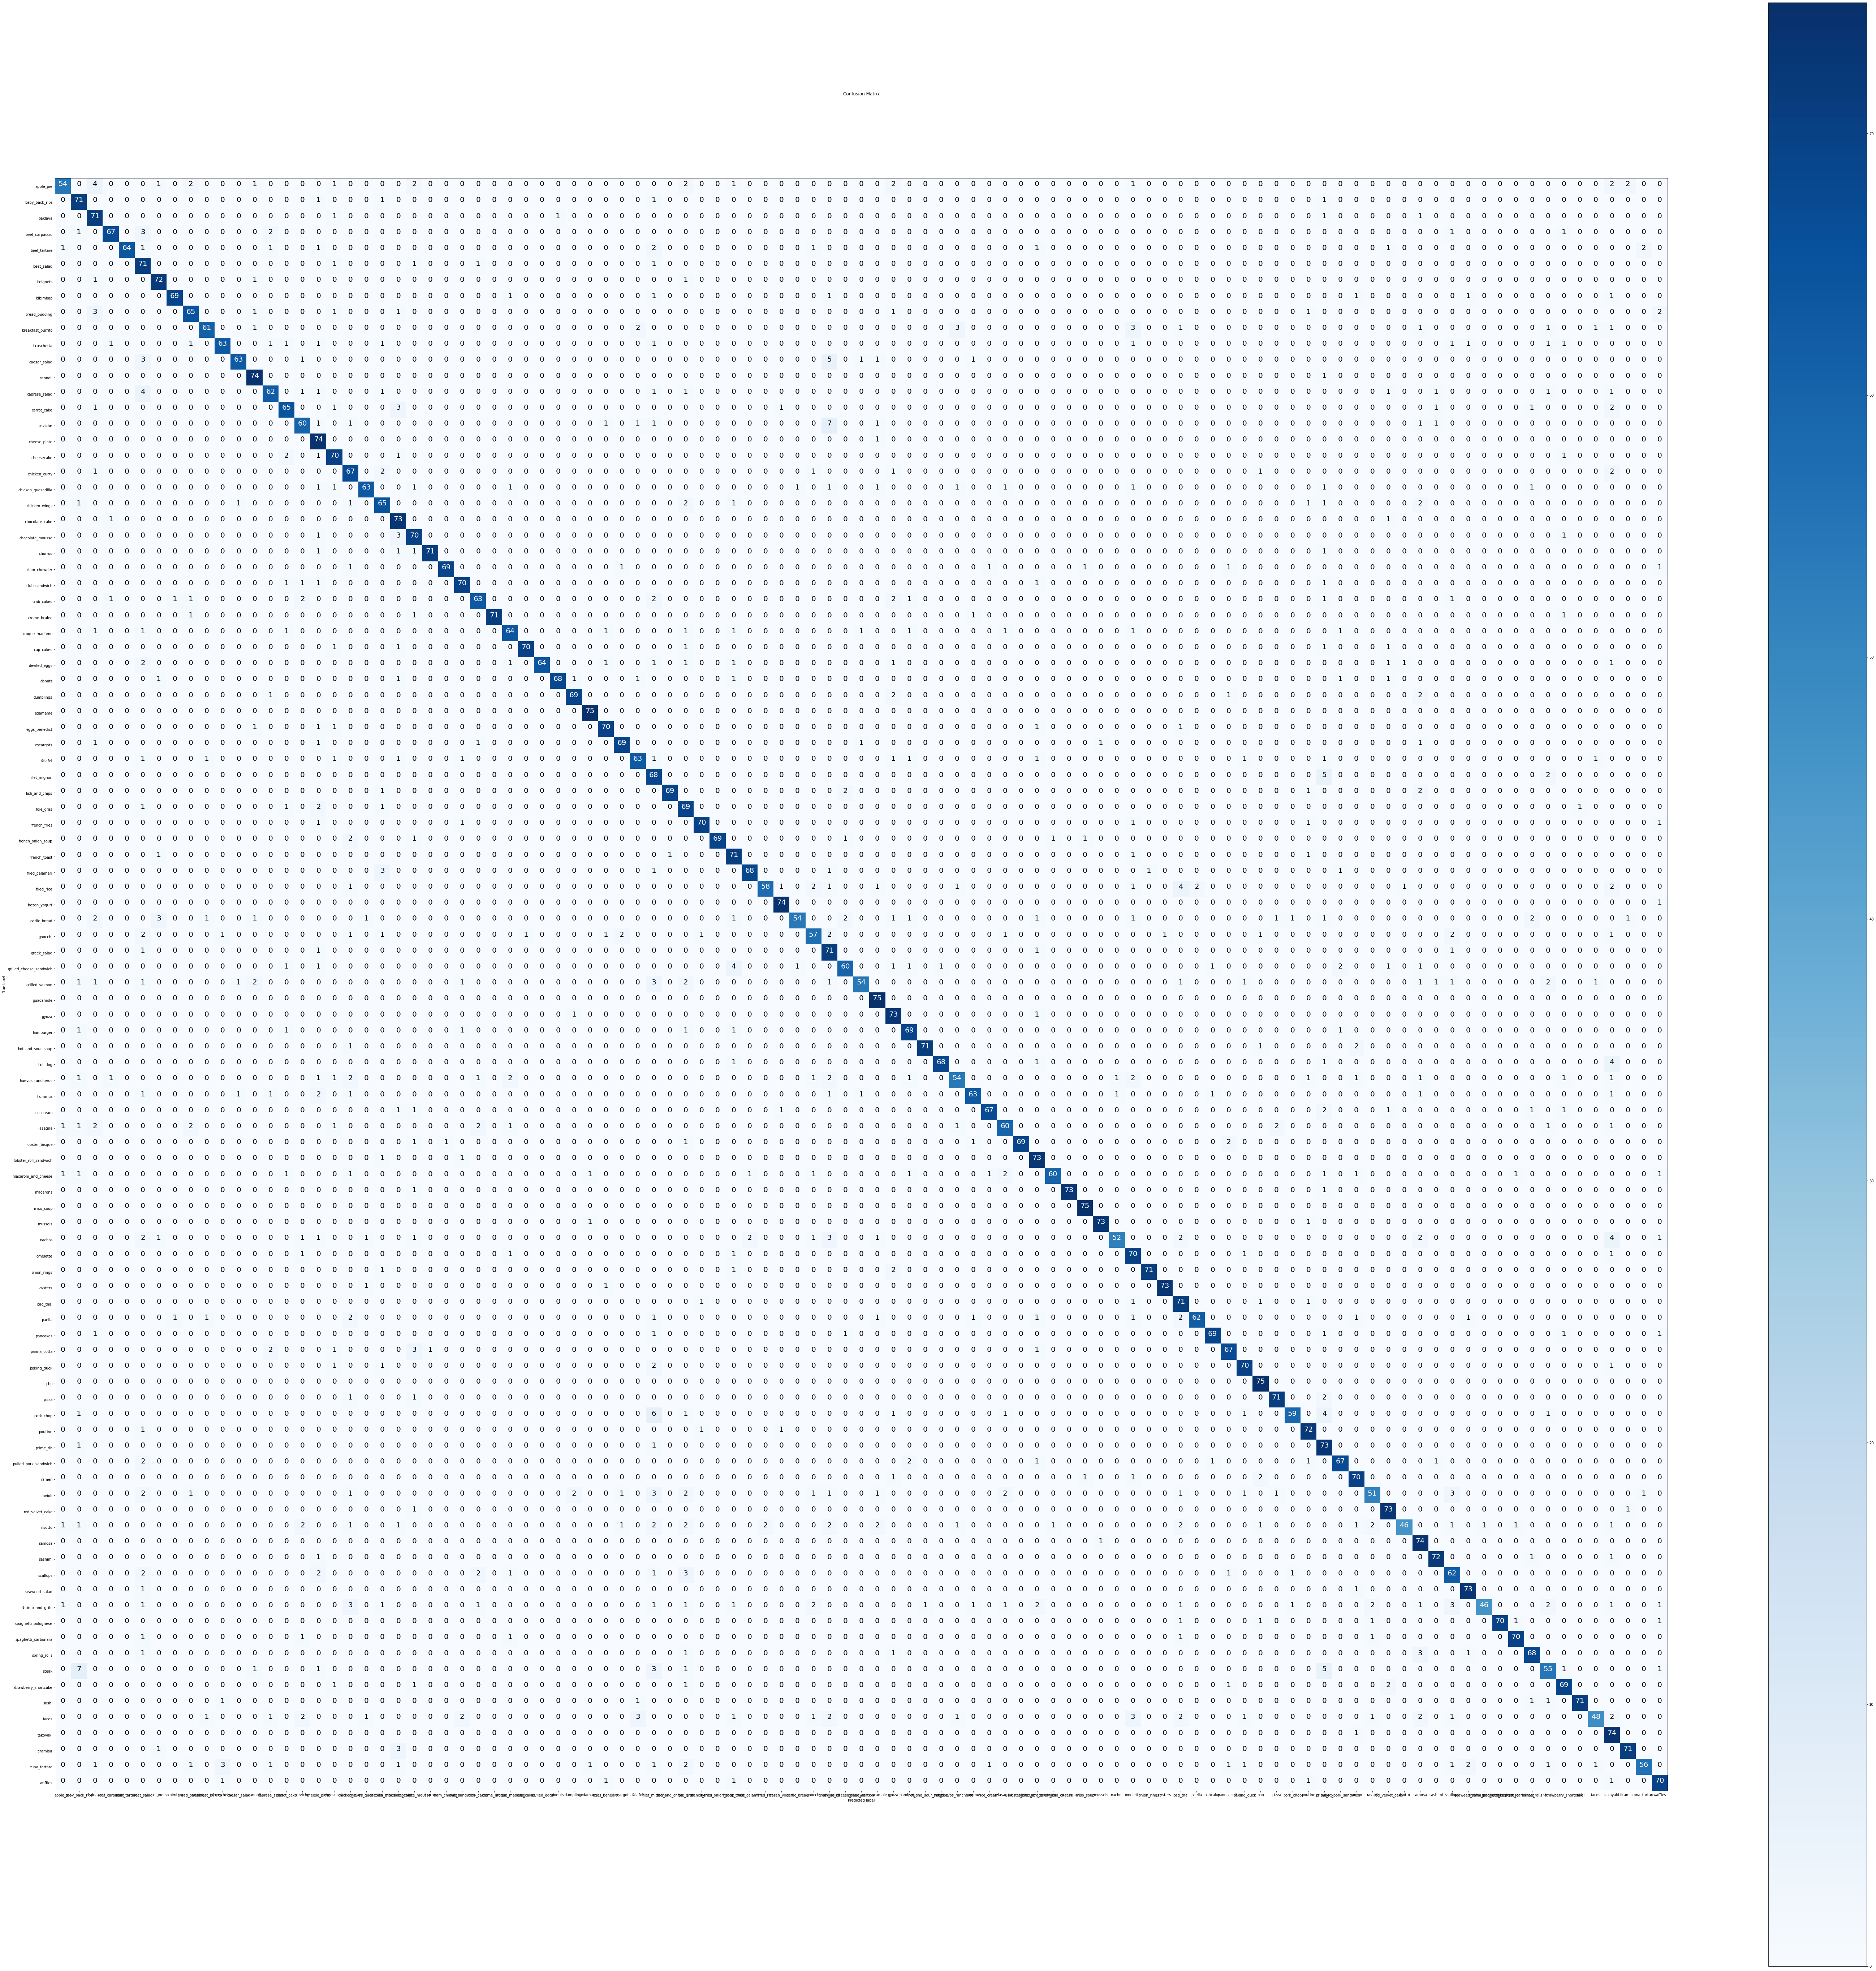

In [140]:
make_confusion_matrix(y_labels, preds, test_data_all.class_names, figsize= (100,100), text_size = 20)

In [146]:
report = classification_report(y_labels, preds)

In [153]:
with open("report.csv", "w") as f:
  f.write(report)

In [155]:
report_df = pd.read_csv("report.csv")

In [158]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        75
           1       0.81      0.95      0.87        75
           2       0.79      0.95      0.86        75
           3       0.94      0.89      0.92        75
           4       1.00      0.85      0.92        75
           5       0.68      0.95      0.79        75
           6       0.90      0.96      0.93        75
           7       0.97      0.92      0.95        75
           8       0.88      0.87      0.87        75
           9       0.94      0.81      0.87        75
          10       0.91      0.84      0.87        75
          11       0.95      0.84      0.89        75
          12       0.89      0.99      0.94        75
          13       0.86      0.83      0.84        75
          14       0.88      0.87      0.87        75
          15       0.83      0.80      0.82        75
          16       0.75      0.99      0.85        75
          17       0.83    

In [159]:
report_dict = classification_report(y_labels, preds , output_dict=True)

In [161]:
df = pd.DataFrame(report_dict)

In [165]:
df.index

Index(['precision', 'recall', 'f1-score', 'support'], dtype='object')

In [170]:
list1 = df.loc['f1-score'][:-3]

In [ ]:
list1

In [182]:
df2["class_names"]  = test_data_all.class_names

In [185]:
df2 = df2.sort_values(by= ["f1-score"])

In [1]:
df2

NameError: ignored

In [188]:
import matplotlib.pyplot as plt
ax , fig  = plt.subplots()
ax.hbar()

In [ ]:
def load_img(file_path):
  tf.io.read_file()